# Hello Quotes | 你好，名人名言

使用Scrapy从爬虫练习网站 http://quotes.toscrape.com/page/1/ 开始爬取5页名言信息。

以JSON (lines)格式保存以下信息：
- 内容
- 作者
- 标签

In [1]:
%pip install scrapy "cryptography<3.4" "pyopenssl<22"

## 实现Pipeline进行存储

In [3]:
class JsonWriterPipeline:
    def open_spider(self, spider):
        # your code here (open the file)
        self.file = open("item.jl","w")
        pass

    def close_spider(self, spider):
        # your code here (close the file)
        self.file.close()
        pass

    def process_item(self, item, spider):
        # your code here (write the item to the file)
        line = json.dumps(item)
        self.file.write(f"{line}\n")
        return item


## 实现简单爬虫

In [5]:
import scrapy


class QuotesSpider(scrapy.Spider):
    name = "quotes"
    
    # your code here (setup the spider)
    def start_requests(self):
        url_template = 'https://quotes.toscrape.com/page/{}/'
        for i in range(1, 6):
            url = url_template.format(i)
            yield scrapy.Request(url, callback=self.parse)

    custom_settings = {
        'ITEM_PIPELINES': {
            JsonWriterPipeline: 400
        }
    }

    def parse(self, response):
        # your code here (extract the data)
        items = response.css("div.quote")
        for item in items:
            text = item.css('span.text::text').get()
            author = item.css('span small.author::text').get()
            tags = item.css('div.tags a.tag::text').getall()
            yield dict(text=text, author=author, tags=tags)
        pass


## 运行爬虫

**注意**：重新运行爬虫，需要重启Jupyter Notebook

In [7]:
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()

2024-10-11 15:15:30 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: scrapybot)
2024-10-11 15:15:30 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.4, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1i  8 Dec 2020), cryptography 3.3.2, Platform Windows-10-10.0.22631-SP0
2024-10-11 15:15:30 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2024-10-11 15:15:30 [py.warnings] WARNING: E:\Anaconda3\anaconda\Lib\site-packages\scrapy\utils\request.py:231: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reas

## 结果示例
如下图的输出中有运行日志，会对爬取的text内容有显示

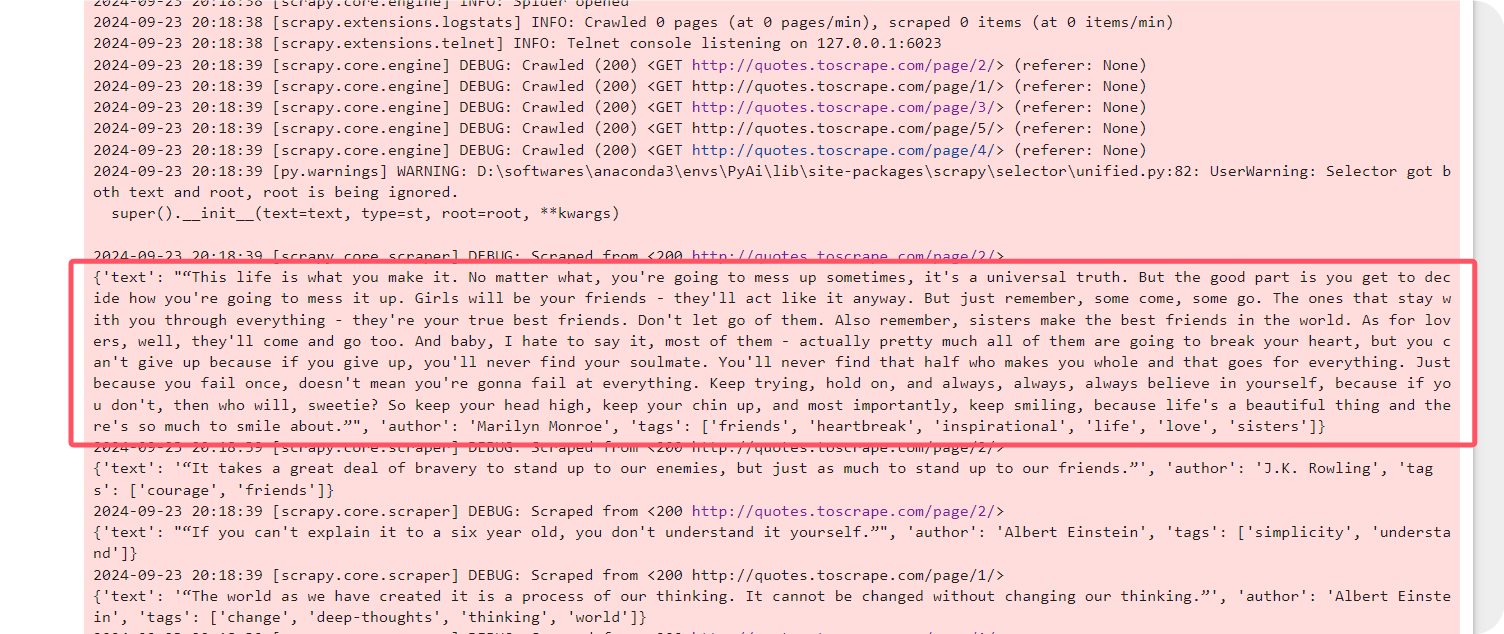

## quotes.jl内容（运行过后同级目录下的这个文件请截图保存到这下面，不用截全）


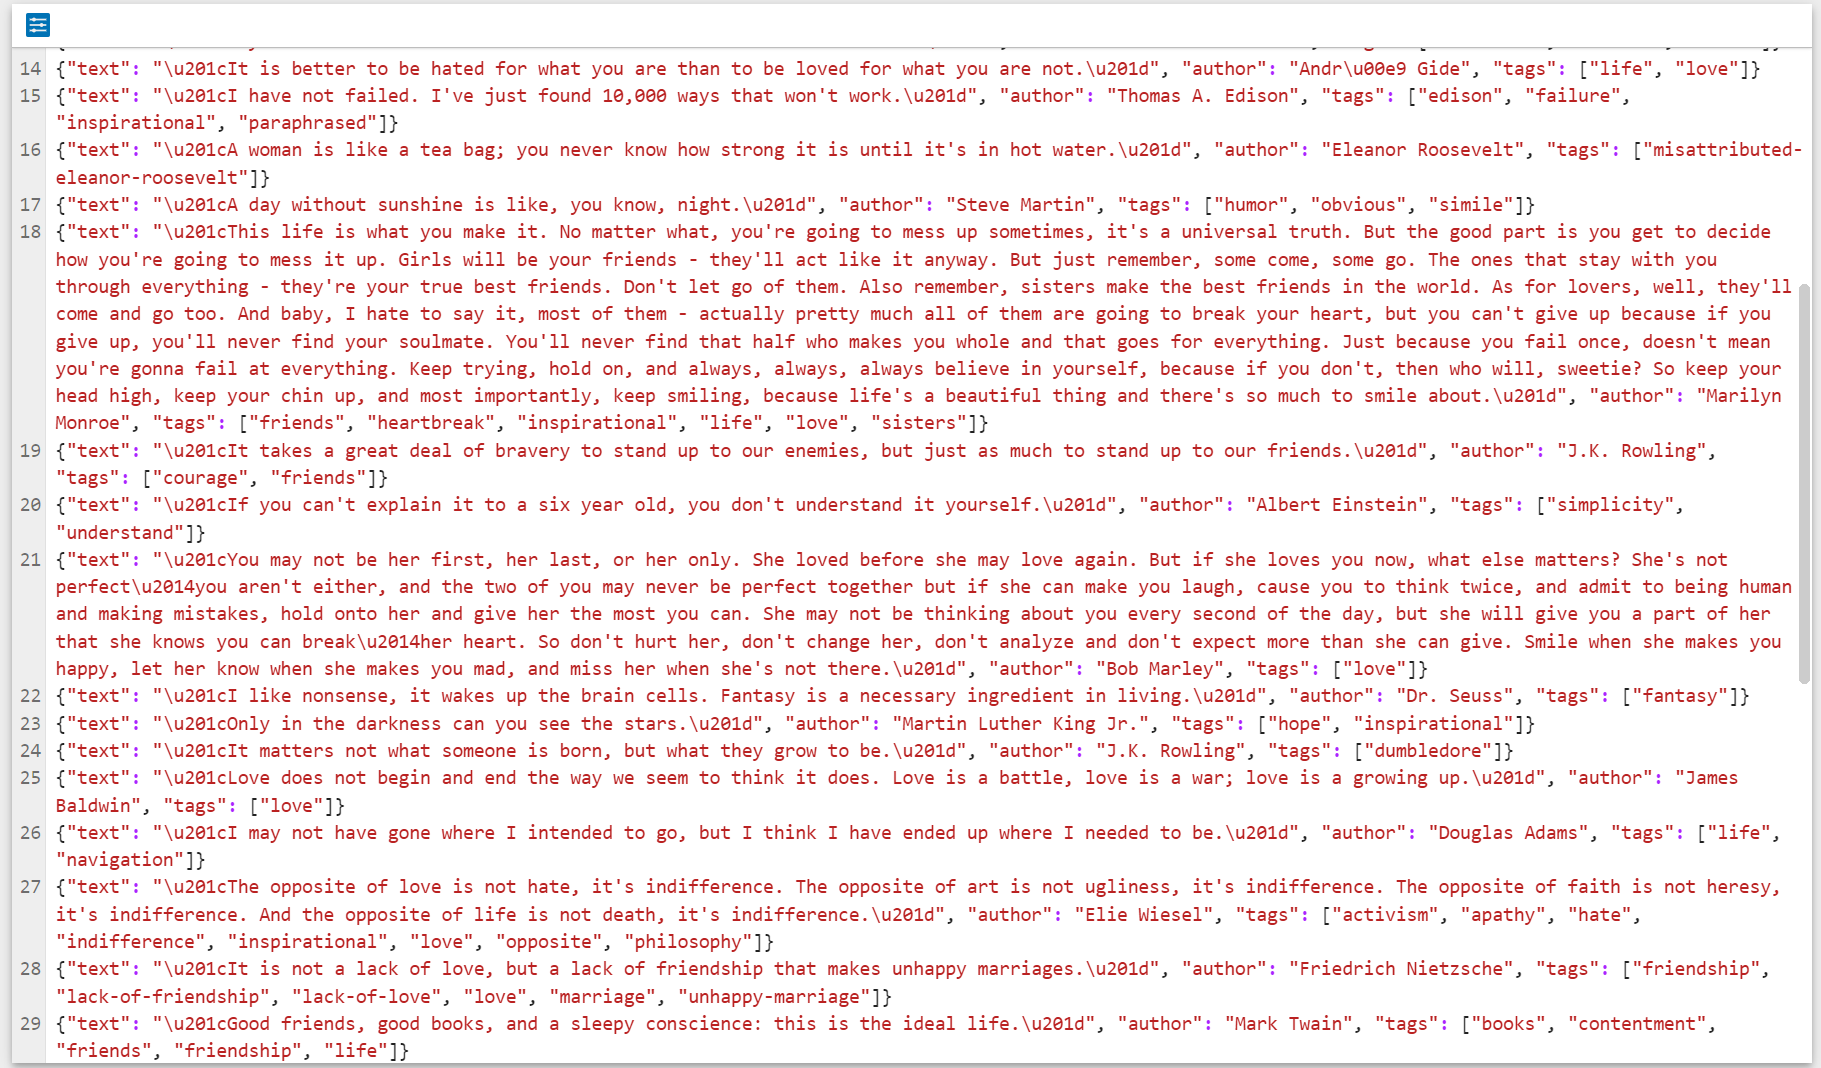